<a href="https://colab.research.google.com/github/TsamayaDesigns/codeDivision-automation-with-python/blob/main/auto_assess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assessment Brief**

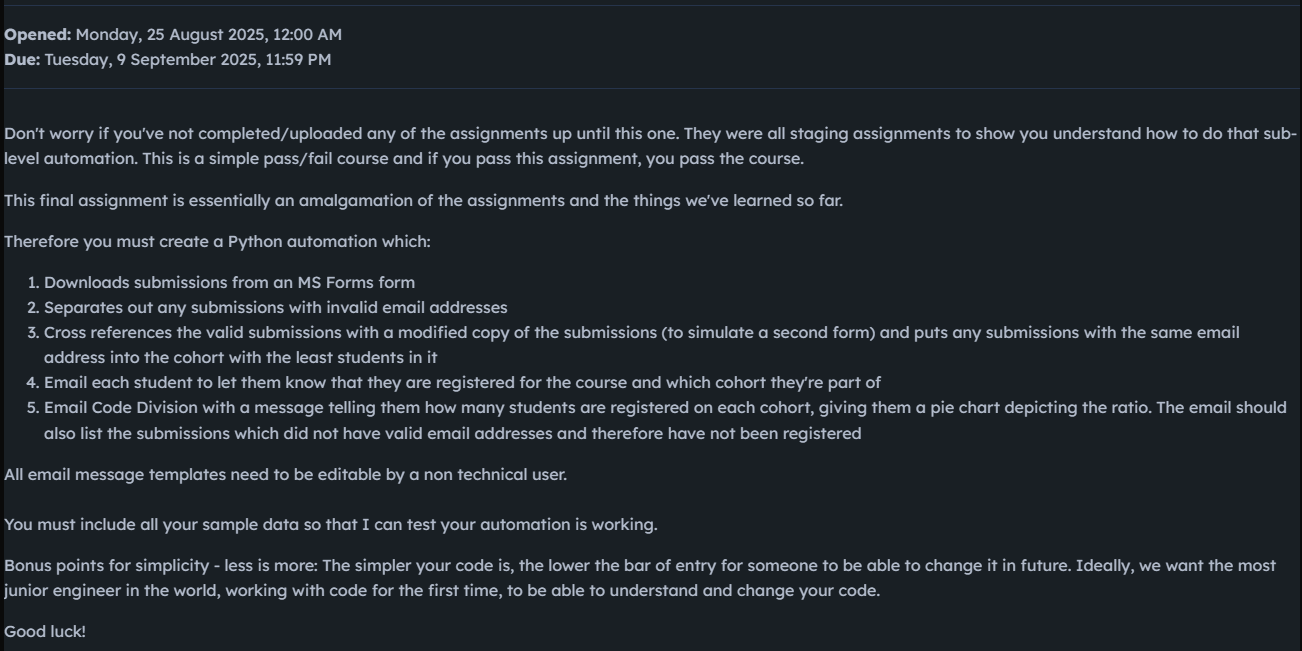



---



**Download files from Google Drive**

Module to download shared Google Drive folders programmatically using `gdown`.

This script:
1. Defines a helper function to download Google Drive folders if not already present locally.
2. Downloads two specific folders: `excel_tools` and `extra_tools`.
3. Verifies and prints their contents after download.

Requirements:
    - gdown (installed via `pip install gdown`)


In [1]:
# Install gdown (tool to download files from Google Drive)
!pip install -q gdown

import os
import logging

logging.basicConfig(level=logging.INFO, format="%(message)s", force=True)

# ---- Function to download a Google Drive folder ----
def download_folder(folder_id, dest_folder):
    """
    Download a Google Drive folder if it does not already exist locally.

    Parameters
    ----------
    folder_id : str
        The Google Drive folder ID from the share link.
    dest_folder : str
        The local folder name to save the contents.

    Returns
    -------
    None

    Notes
    -----
    Uses the `gdown` command-line tool to fetch the folder. If the folder
    already exists, it is not re-downloaded.
    """
    if not os.path.exists(dest_folder):
      os.system(f"gdown --folder --id {folder_id} -O {dest_folder}")

      if os.path.exists(dest_folder):
        logging.info(f"✅ Folder downloaded: {dest_folder}")

      else:
        logging.info(f"❌ Failed to download folder: {dest_folder}")

    else:
        logging.info(f"ℹ️ Folder already exists: {dest_folder}")

# ---- 1. Download folder (excel_tools) if it doesn't exist ----
download_folder("1D7RRM-r7YeALZ-kLetVj4pAECECYWHFj", "excel_tools")

# ---- 2. Download folder (extra_tools) if it doesn't exist ----
download_folder("1FiBobm433Gb1ucc1KQ1GEh6j4uIbG76k", "extra_tools")

# ---- 3. Verify that the folders were downloaded correctly ----
logging.info("")
logging.info("Folder Content:")
logging.info(f"excel_tools: {os.listdir('excel_tools')}")
logging.info(f"extra_tools: {os.listdir('extra_tools')}")

✅ Folder downloaded: excel_tools
✅ Folder downloaded: extra_tools

Folder Content:
excel_tools: ['tools.py', '__init__.py']
extra_tools: ['creds.py', 'charts.py', 'file_ops.py', 'smtp.py', 'body.txt', 'html_tools.py']




---



**Download Submissions from Ms Forms**

This script downloads Excel files exported from Microsoft Forms via OneDrive sharing links and saves them locally.

It is intended for handling form responses that are stored in OneDrive.

Functions:

    download_data(url: str, file_name: str) -> None
        Downloads an Excel file from a given OneDrive link and saves it locally.

Usage:

    The script downloads two specific Excel files from OneDrive and saves them as:
        - form_responses1.xlsx
        - form_responses2.xlsx

A message is printed indicating whether each download succeeded or failed.


In [13]:
from requests import get
import sys
sys.path.append("extra_tools")
from file_ops import save

url1 = 'https://1drv.ms/x/c/e4158dc5676393d7/EUUe3RUal-NNi--EAXPnRBYB88a5r84KchryyncQvSLUhQ?e=SS8Wo9'
url2 = 'https://1drv.ms/x/c/e4158dc5676393d7/ESPx1tZ7o_5JhRnl7Td6ZqEBesJbQRqvROVvqF6n6BsJPQ?e=WojggM'

# Function to download Excel files exported from Microsoft Forms
def download_data(url, file_name):
    """
    Download an Excel file from a OneDrive link and save it locally.

    This function appends the `&download=1` parameter to the provided
    OneDrive link to force file download. The file is retrieved using
    an HTTP GET request and saved locally with the given filename.

    Parameters
    ----------
    url : str
        The OneDrive sharing link.
    file_name : str
        The local filename to save the file as.

    Returns
    -------
    str
        Path to the saved file.

    Raises
    ------
    requests.exceptions.RequestException
        If the HTTP request fails.
    """

    download_url = url + "&download=1"

    response = get(download_url)

    if response.status_code == 200:
      save(response.content, file_name)
      logging.info(f"✅ {file_name} downloaded successfully.")

    else:
      logging.info(f"❌ Failed to download {file_name}. Status code:", response.status_code)

# Download the files
download_data(url1, "form_responses1.xlsx")
download_data(url2, "form_responses2.xlsx")


✅ form_responses1.xlsx downloaded successfully.
✅ form_responses2.xlsx downloaded successfully.




---



**Read Form Submissions**

Module for loading and extracting specific fields from Excel survey/form response files.

This module provides a utility function `load_excel_sheets` that
- attempts to read two Excel files,
- extract specified columns, and
- return them as data structures (e.g., pandas DataFrames).

It includes basic error handling for missing files and other exceptions.  


In [12]:
from excel_tools import read_sheet

def load_excel_sheets(file1, file2, fields):
  """
  Load two Excel files and extract specified fields.

  Parameters
  ----------
  file1 : str
      Path to the first Excel file.
  file2 : str
      Path to the second Excel file.
  fields : list of str
      List of column names to extract from each file.

  Returns
  -------
  tuple of pandas.DataFrame
      A tuple `(subs1, subs2)` containing the extracted data
      from `file1` and `file2`.

  Raises
  ------
  FileNotFoundError
      If one of the specified files does not exist.
  Exception
      For any other errors encountered during reading.

  Notes
  -----
  If an error occurs, the function logs the error message and returns None.
  """
  try:
    subs1 = read_sheet(file1, fields = fields)
    subs2 = read_sheet(file2, fields = fields)
    logging.info(f'✅ Forms load successfully: \n{file1}\n{file2}')
    return subs1, subs2

  except FileNotFoundError as e:
      logging.info(f"❌ File not found: {e.filename}")

  except Exception as e:
      logging.info(f"❌ An error occurred: {e}")

# Define the columns/fields to extract
fields = ['ID', 'Start_time', 'Completion_time', 'User_Email', 'Name', 'full_name', 'Need_365', 'Mac_or_PC', 'Moodle_Email', 'Attending', 'Alternative', 'Council', 'Postcode', 'NeuroDivergent', 'Woman', 'Minority', 'Disabled', 'Refugee']

# Read the Excel files
subs1, subs2 = load_excel_sheets('form_responses1.xlsx', 'form_responses2.xlsx', fields = fields)

✅ Forms load successfully: 
form_responses1.xlsx
form_responses2.xlsx




---



**Email Validation**

Module for validating Moodle email addresses from enrolment forms.

This script provides:
- A regex-based email validator.
- A function to check the validity of Moodle email addresses.
- A function to process lists of student enrolments and print/return
  valid and invalid emails by form.

In [14]:
import re

# Check if email address is valid
EMAIL_REGEX = re.compile(
    r"^[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$"
)

def validate_emails(Moodle_Email):
  """
  Validate a given Moodle email address.

  Parameters
  ----------
  Moodle_Email : str
      The email address to be validated.

  Returns
  -------
  tuple of list of str
      invalid_emails : list of formatted strings for invalid emails.
      valid_emails : list of formatted strings for valid emails.

  Notes
  -----
  The function checks the format of the email string.
  Additional validation rules may be added as needed.
  """

  valid_emails = []
  invalid_emails = []

  if not EMAIL_REGEX.match(Moodle_Email.strip()):
    invalid_emails.append(f'Moodle_Email: {Moodle_Email.strip()}')
  else:
    valid_emails.append(f'Moodle_Email: {Moodle_Email.strip()}')

  return invalid_emails, valid_emails


# Print all valid emails
def get_valid_emails(subs_list, form_name):
  """
  Process a list of subscription objects and check which Moodle emails are valid.

  Parameters
  ----------
  subs_list : list
      List of objects, each having attributes `full_name` and `Moodle_Email`.
  form_name : str
      The name of the form (used for logging summary results).

  Returns
  -------
  tuple of list of tuple
      form_valid_emails : list of (full_name, email) tuples for valid emails.
      form_invalid_emails : list of (full_name, email) tuples for invalid emails.

  Notes
  -----
  Prints a summary of valid and invalid email counts for the given form.
  """

  # Collect all valid emails
  form_valid_emails = []
  form_invalid_emails = []

  for sub in subs_list:
      _, valid_emails = validate_emails(sub.Moodle_Email)
      if valid_emails:
        form_valid_emails.append((sub.full_name, sub.Moodle_Email))
      else:
        form_invalid_emails.append((sub.full_name, sub.Moodle_Email))

  # Print summary
  logging.info(f'{len(form_valid_emails)} - Valid emails from {form_name}')
  logging.info(f'{len(form_invalid_emails)} - Invalid emails from {form_name}')
  logging.info("")
  return form_valid_emails, form_invalid_emails

valid_emails_f1, invalid_emails_f1 = get_valid_emails(subs1, 'EnrolmentForm1.xlsx')
valid_emails_f2, invalid_emails_f2 = get_valid_emails(subs2, 'EnrolmentForm2.xlsx')

26 - Valid emails from EnrolmentForm1.xlsx
1 - Invalid emails from EnrolmentForm1.xlsx

22 - Valid emails from EnrolmentForm2.xlsx
2 - Invalid emails from EnrolmentForm2.xlsx





---



**Duplicate Email Check**

This script compares two sets of valid email registrations (from two forms) to:
1. Identify duplicate email submissions.
2. Separate unique emails into two lists (`cohort_1` and `cohort_2`).
3. Redistribute duplicate emails to balance the number of registrations between the two cohorts.

Variables:

    valid_emails_f1 (list): List of valid email entries from form 1.
    valid_emails_f2 (list): List of valid email entries from form 2.
    duplicate_emails (list): List of email addresses submitted on both forms.
    cohort_1 (list): List of unique (and redistributed) emails for cohort 1.
    cohort_2 (list): List of unique (and redistributed) emails for cohort 2.

In [5]:
# Store duplicates and unique email lists
duplicate_emails = []
cohort_1 = []
cohort_2 = []

# Identify duplicates and unique emails from Form 1
for full_name in valid_emails_f1:
  if full_name in valid_emails_f2 and full_name not in duplicate_emails:
    duplicate_emails.append(full_name)
  else:
    if full_name not in cohort_1:
      cohort_1.append(full_name)

# Identify duplicates and unique emails from Form 2
for full_name in valid_emails_f2:
  if full_name not in duplicate_emails and full_name not in cohort_2:
    cohort_2.append(full_name)

# Distribute duplicates to balance cohorts
for duplicate_email in duplicate_emails:
  if len(cohort_1) < len(cohort_2):
    cohort_1.append(duplicate_email)
  else:
    cohort_2.append(duplicate_email)

# Summary Output
logging.info(f'Invalid registrations (Number): {len(invalid_emails_f1) + len(invalid_emails_f2)}')
logging.info("")
logging.info(f'Valid registrations - Form1 (valid_emails_f1): {len(valid_emails_f1)}')
logging.info(f'Valid registrations - Form2 (valid_emails_f2): {len(valid_emails_f2)}')
logging.info("")
logging.info(f'Duplicate submissions (Number): {len(duplicate_emails)}')
logging.info("")
logging.info(f'New subs1 Emails (cohort 1): {len(cohort_1)}')
logging.info(f'New subs2 Emails (cohort 2): {len(cohort_2)}')


Invalid registrations (Number): 3

Valid registrations - Form1 (valid_emails_f1): 26
Valid registrations - Form2 (valid_emails_f2): 22

Duplicate submissions (Number): 7

New subs1 Emails (cohort 1): 20
New subs2 Emails (cohort 2): 21




---



**Send registration email to student(s)**

This script reads an email template from a text file and sends personalised emails to students in different cohorts, logging the success or failure of each send.It:

1. Reads the email content from a text file.
2. Formats the email for each student with their name, cohort, and scheduled date.
3. Sends the emails using SMTP credentials.
4. Logs the success or failure of each email sent.

Variables:

    cohort (list of tuple): List of students as tuples (full_name, Moodle_Email).
    cohort_name (str): Name of the cohort, included in the email content.
    cohort_date (str): Scheduled date for the cohort, included in the email content.


In [15]:
from extra_tools.smtp import send
from extra_tools.creds import email, pw

# Send emails to students
def read_text(path):
  """
  Read the contents of a text file.

  Parameters
  ----------
  path : str
      The path to the text file to be read.

  Returns
  -------
  str
      The contents of the file as a string.
    """
  with open(path, 'r', encoding='utf-8') as file:
    text = file.read()
  return text

message = read_text('extra_tools/body.txt')

logging.info(f'Displaying Imported message:\n\n {message}\n') # Display the imported message (message)
logging.info("")

# Send emails to students
def send_emails(cohort, cohort_name, cohort_date):
  """
  Send formatted emails to a list of students in a cohort.

  Parameters
  ----------
  cohort : list of tuple
      List of students where each student is a tuple containing (full_name, Moodle_Email).
  cohort_name : str
      Name of the cohort, used in the email content.
  cohort_date : str
      Scheduled date for the cohort, used in the email content.

  Returns
  -------
  None
      Logs the success or failure of each email sent.
  """

  logging.info(f'=== Sending emails to {cohort_name} students ===')

  for student in cohort:
    full_name, Moodle_Email = student

    logging.info(f'\nSending email to Student: {full_name} - ({Moodle_Email})')

    # Call message function
    email_body = message.format(student = full_name, date = cohort_date, cohort_name = cohort_name)

    # Sending the Email
    success = send(
        sender = email,
        app_pass = pw,
        recip = "registrations@anysupport.co.uk", # Enter "Moodle_Email" if sending to students
        sub = "Test Email from Colab",
        body = email_body
    )

    if success:
      logging.info(f'Email sent successfully to {full_name}.')
    else:
      logging.info(f'Failed to send email to {full_name} - ({Moodle_Email})')


# Send emails to students
send_emails(cohort_1, "Cohort 1", "20/09/2025")
logging.info("")
send_emails(cohort_2, "Cohort 2", "05/09/2025")

Displaying Imported message:

 Hi {student},

Thank you for enrolling on the course of {date} for Python.

You have been allocated to {cohort_name}.

We look forward to seeing you on the course.

Kind regards,

Code Division


=== Sending emails to Cohort 1 students ===

Sending email to Student: Piet Pompies - (piet@email.com)
Email sent successfully to Piet Pompies.

Sending email to Student: Jan Pampoen - (jan@email.com)


Email sent successfully!


Email sent successfully to Jan Pampoen.

Sending email to Student: Koos Kakebeen - (koos@email.com)


Email sent successfully!


Email sent successfully to Koos Kakebeen.

Sending email to Student: Peter Pumpkineater - (peter@email.com)


Email sent successfully!


Email sent successfully to Peter Pumpkineater.

Sending email to Student: Gert Coetzee - (gert@google.com)


Email sent successfully!


Email sent successfully to Gert Coetzee.

Sending email to Student: Blake Turner - (thompsonpeter@example.org)


Email sent successfully!


Email sent successfully to Blake Turner.

Sending email to Student: Anna Marsh - (turnerstephanie@example.com)


Email sent successfully!


Email sent successfully to Anna Marsh.

Sending email to Student: William Edwards - (patrick79@example.com)


Email sent successfully!


Email sent successfully to William Edwards.

Sending email to Student: Thomas Dixon - (usims@example.net)


Email sent successfully!


Email sent successfully to Thomas Dixon.

Sending email to Student: Jonathan Morton - (deborahcuevas@example.net)


Email sent successfully!


Email sent successfully to Jonathan Morton.

Sending email to Student: Russell Frederick - (markbutler@example.org)


Email sent successfully!


Email sent successfully to Russell Frederick.

Sending email to Student: John Bowman - (samanthabrown@example.net)


Email sent successfully!


Email sent successfully to John Bowman.

Sending email to Student: Alyssa White - (millerdouglas@example.org)


Email sent successfully!


Email sent successfully to Alyssa White.

Sending email to Student: Katrina Cook - (leemary@example.com)


Email sent successfully!


Email sent successfully to Katrina Cook.

Sending email to Student: Lisa Williams - (qhayes@example.net)


Email sent successfully!


Email sent successfully to Lisa Williams.

Sending email to Student: Danielle Price - (pmanning@example.com)


Email sent successfully!


Email sent successfully to Danielle Price.

Sending email to Student: Olivia Garcia - (frankchloe@example.net)


Email sent successfully!


Email sent successfully to Olivia Garcia.

Sending email to Student: Gary Reed - (thomas19@example.net)


Email sent successfully!


Email sent successfully to Gary Reed.

Sending email to Student: Debra Gilmore - (anthony19@example.com)


Email sent successfully!


Email sent successfully to Debra Gilmore.

Sending email to Student: Kent Holden - (fgarcia@example.net)


Email sent successfully!


Email sent successfully to Kent Holden.

=== Sending emails to Cohort 2 students ===

Sending email to Student: Mike Hassett - (mike@mail.com)


Email sent successfully!


Email sent successfully to Mike Hassett.

Sending email to Student: Ben Burger - (ben@gmail.com)


Email sent successfully!


Email sent successfully to Ben Burger.

Sending email to Student: Clive Greenwood - (clive@trustytransport.co.za)


Email sent successfully!


Email sent successfully to Clive Greenwood.

Sending email to Student: Coolhand Luke - (coolhand@yahoo.com)


Email sent successfully!


Email sent successfully to Coolhand Luke.

Sending email to Student: Steph Rossouw - (steph@windhoek.co.na)


Email sent successfully!


Email sent successfully to Steph Rossouw.

Sending email to Student: Gert Swanepoel - (gert@gmail.com)


Email sent successfully!


Email sent successfully to Gert Swanepoel.

Sending email to Student: Sierra Johnson - (connor11@example.com)


Email sent successfully!


Email sent successfully to Sierra Johnson.

Sending email to Student: Kimberly Brown - (sabrina37@example.com)


Email sent successfully!


Email sent successfully to Kimberly Brown.

Sending email to Student: Tammy Davis - (kevin77@example.org)


Email sent successfully!


Email sent successfully to Tammy Davis.

Sending email to Student: Carolyn Nguyen - (thomasjoseph@example.com)


Email sent successfully!


Email sent successfully to Carolyn Nguyen.

Sending email to Student: Kyle Barber - (owalker@example.org)


Email sent successfully!


Email sent successfully to Kyle Barber.

Sending email to Student: Karen Woods - (mckayangela@example.com)


Email sent successfully!


Email sent successfully to Karen Woods.

Sending email to Student: Matthew Rangel - (wknight@example.net)


Email sent successfully!


Email sent successfully to Matthew Rangel.

Sending email to Student: Stephanie Johnston - (hdowns@example.net)


Email sent successfully!


Email sent successfully to Stephanie Johnston.

Sending email to Student: Gloria Johnson - (andrewcastillo@example.org)


Email sent successfully!


Email sent successfully to Gloria Johnson.

Sending email to Student: Jan Pierewiet - (JanP@outlook.com)


Email sent successfully!


Email sent successfully to Jan Pierewiet.

Sending email to Student: Amy Tran - (gpacheco@example.net)


Email sent successfully!


Email sent successfully to Amy Tran.

Sending email to Student: Tony Davis - (nicole91@example.com)


Email sent successfully!


Email sent successfully to Tony Davis.

Sending email to Student: Stephen Jackson - (millerjustin@example.com)


Email sent successfully!


Email sent successfully to Stephen Jackson.

Sending email to Student: Brian Stewart - (vincentsampson@example.org)


Email sent successfully!


Email sent successfully to Brian Stewart.

Sending email to Student: Penny Moore - (cory40@example.net)


Email sent successfully!


Email sent successfully to Penny Moore.


Email sent successfully!




---



**Email to CodeDivision**

Generate and send a styled HTML email containing a cohort report.
The report includes:
- A summary of the number of students in each cohort
- A pie chart visualizing cohort distribution
- A list of invalid registrations (name and email)

Variables:

    cohort_1 (list): List of unique (and redistributed) emails for cohort 1.
    cohort_2 (list): List of unique (and redistributed) emails for cohort 2.
    invalid_emails_f1 : list[tuple[str, str]] - Invalid registrations found in file 1. Each tuple is (name, email).
    invalid_emails_f2 : list[tuple[str, str]] - Invalid registrations found in file 2. Each tuple is (name, email).




In [9]:
from charts import create_pie, plt_base64
from html_tools import send
import html

# Define labels and sizes
labels = ['Cohort 1', 'Cohort 2']
sizes = [len(cohort_1), len(cohort_2)]

#  Create pie chart representing student distribution
fig = create_pie(labels, sizes, in_title='Ratio of Students per Cohort')
img = plt_base64(fig)

# Build HTML list items of invalid emails
invalid_email_list = "".join(f"<li>{html.escape(name)} - {html.escape(email)}</li>"
  for name, email in invalid_emails_f1 + invalid_emails_f2)

# Styled HTML email
html_body = f"""
<html>
  <body style="font-family: Arial, sans-serif; background-color: #f4f6f8; color: #333; padding: 20px;">
    <div style="max-width: 600px; margin: auto; background-color: #fff; padding: 20px; border-radius: 10px; box-shadow: 0 4px 10px rgba(0,0,0,0.1);">

      <h2 style="color: #2a7ae2; text-align: center;">Cohort Report</h2>
      <p>Hi Frank,</p>
      <p>Here’s the summary of students in each cohort:</p>

      <!-- Cohort boxes -->
      <div style="display: flex; justify-content: space-around; margin: 20px 0;">

        <div style="background-color: #e3f2fd; padding: 15px; border-radius: 8px; width: 45%; text-align: center;">
          <h3>Cohort 1</h3>
          <p style="font-size: 24px; font-weight: bold; margin: 0;">{sizes[0]}</p>
        </div>

        <div style="background-color: #ffe0b2; padding: 15px; border-radius: 8px; width: 45%; text-align: center;">
          <h3>Cohort 2</h3>
          <p style="font-size: 24px; font-weight: bold; margin: 0;">{sizes[1]}</p>
        </div>
      </div>

      <!-- Pie chart -->
      <div style="text-align: center; margin: 20px 0;">
        <img src="data:image/png;base64,{img}" alt="Cohort Pie Chart" style="max-width: 400px; border-radius: 8px; border: 1px solid #ddd;"/>
      </div>

      <!-- Invalid Registrations -->
      <div style="margin: 20px 0; padding: 15px; border-radius: 8px; background-color: #ffebee; text-align: center; border: 1px solid #f44336;">
        <h3>Invalid Registrations</h3>
        <p style="font-size: 24px; font-weight: bold; margin: 0;">{len(invalid_emails_f1) + len(invalid_emails_f2)}</p>
        <hr style="border: 0; border-top: 1px solid #ddd; margin: 10px 0;"/>
        <ul style="margin-left: 20px; text-align: left;">
          {invalid_email_list}
        </ul>
      </div>

      <p>Thanks,<br/><strong>Reporting Bot</strong></p>
      <hr style="border: 0; border-top: 1px solid #eee; margin-top: 20px;"/>
    </div>
  </body>
</html>
"""

# Send email
send(
    sender='registrations@anysupport.co.uk',
    app_pass=pw,
    recip='eugene@anysupport.co.uk',
    sub='Cohort report',
    html_body=html_body
)

Email sent successfully!


True



---

